# Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

## Task 1 

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [51]:
corona_dataset_csv = pd.read_csv("covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [52]:
corona_dataset_csv.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [53]:
#iki parantez arasinda bir sey yazmayip imlecin kaldigi yerde "shift + tab" a bastiginizda help secenekleri karsiniza cikar.

In [54]:
#veri tablomuzda lat - long degerlerini göstermek istemedigimiz icin drop(["",""],axis=1) yani yeni gösterim olarak yansitacagiz
#axis = 0 default verisi icin degerdir! 
#yeni df icin: df = corona_dataset_csv.drop(["Lat", "Long"],axis=1)
#ya da yeni df yazmadan var olani degistirebiliriz:

corona_dataset_csv.drop(["Lat", "Long"],axis=1,inplace=True) 

#netice olarak her iki durumda da yeni istedigimiz lon ve lat verileri eksiltilmis veri cercevemize ulasmis oluruz

In [55]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Task 2.3: Aggregating the rows by the country

In [56]:
#country/region dan önceki bos olan NaN degerli satirlar dikkatimizi cekiyor ve onlardan kurtulmak istiyoruz. 
#Daha temiz veri cercevesi icin adim atmanin sirasi

corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

#as you can see here we have aggregated all of the columns on the country and region 

In [57]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [58]:
#kac ülke ve kac degerlendirme sütunu oldugunu rakamsal göstermek icin shape kullaniriz:
corona_dataset_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

In [48]:
#sadece cine ait günlük verileri cekmek istersek:

corona_dataset_aggregated.loc["China"]

1/22/20                 548.0
1/23/20                 643.0
1/24/20                 920.0
1/25/20                1406.0
1/26/20                2075.0
                       ...   
4/27/20               83918.0
4/28/20               83940.0
4/29/20               83944.0
4/30/20               83956.0
max_infection_rate    15136.0
Name: China, Length: 101, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


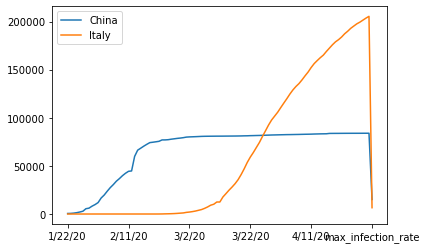

In [49]:
#ayni veriyi plot ile görsellestirmek istersek:

corona_dataset_aggregated.loc["China"].plot()

plt.legend()

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

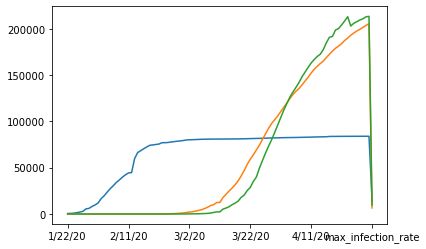

In [50]:
#ayni grafige baska ülkeler eklemek istersek:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


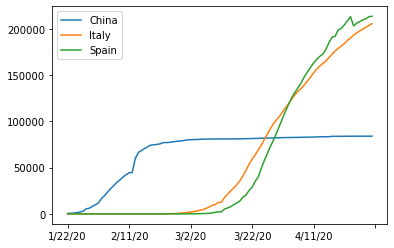

In [59]:
#grafikte yer alan ülkelerin renkleriyle ayri bir cerceede belirtilmesini istersek en son satira sunu ekliyoruz:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()

plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

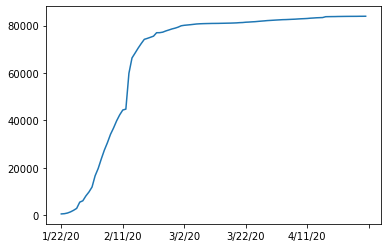

In [14]:
corona_dataset_aggregated.loc['China'].plot()

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

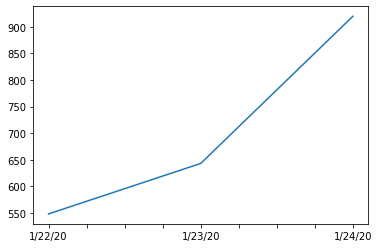

In [15]:
#sadece veri setimizdeki ilk 3 günün verisini Cin icin göstermek istersek:

corona_dataset_aggregated.loc["China"][:3].plot()

### task 3.1: caculating the first derivative of the curve

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

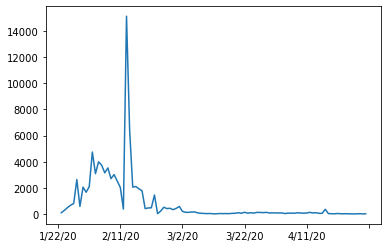

In [16]:
#bu tarz türevli grafik gösteriminden yola cikarak hangi periyotlarin öne ciktigini ve 
#infekte sayilarindaki göze carpan trend noktalarini daha iyi gözlemleyebiliriz

corona_dataset_aggregated.loc["China"].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [17]:
#maksimum yeni enfekte hasta sayisini ögrenmek icin (Cin - Italya - Ispanya):

corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [18]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [19]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [20]:
#tüm ülkelerdeki mak sayilarini liste seklinde yazdirmak icin:
#(tabi ki burda veriler biraz ham bir sekilde görülecektir, ülke isimleri görünmeyecek!)

countries = list(corona_dataset_aggregated.index)
max_infection_rates = []  #bu bos bir liste
for c in countries :      #simdi bir döngü olusturuyoruz,her ülke icin liste ismini countries diye belirledigimiz icin karisiklik olmamasi icin her country ifadesini kisace her c diyelim:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

max_infection_rates

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [21]:
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [22]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: create a new dataframe with only needed column 

In [23]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [24]:
corona_data.head()
#böylece sadece ülkelerdeki max enfekte sayilari bir veri cercevesinde görülecektir

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [25]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [26]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [27]:
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [28]:
#kullanmayacagimiz sütunlari useless olarak belirtmistik simdi axis 1 inplace true ile yeni son hali olusturalim:

happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [29]:
happiness_report_csv.set_index("Country or region",inplace=True)

In [30]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [31]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [32]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [33]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [34]:
happiness_report_csv.shape

(156, 4)

In [35]:
#ülkeler mutluluk siralamasi kriterleri ve max enfekte olan sayi arasindaki korelasyon icin iki veri setimizde artik hazir

data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix 

In [36]:
data.corr() #calistirdigimizda:
#as you can see we have a matrix which is called correlation matrix.
#this matrix consists of correlation coefficcients off every two columns in our data set, for example here we have max inf,rate
#and GDP per capita and this is the correlation coefficient between these two variables.
#as this value gets higher, it means teh correlation between these two variables is also higher. 
#for ex. if you look at max inf. rate so we have maximum infection rate and also max inf rate column.So these two variables- 
#all the same. So they have a complete correlation complete positive correlation together. Because there one thing basically.
#if you look at other of life factors, for ex social support has the life expectancy and freedom to make life choices is also-
#we can see that we have positive correlations betwen all off other life factors.
#So we have found the result off our analysis and we found factors that correlate with maximum infection rate.

#now we will be familiar with Seaborn and visualize this results

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [37]:
#our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [ ]:
#we found out that there are positive correlation between the max inf rate and all off the life factors  that we have in our-
#data set. but they should know and analysis is not finished. Unless you visualize the result in terms of figures and graphs-
#so that everyone can understand it. 
#In this task, i'am going to introduce you to seaborn module, which is a very handed tool for regionalisation.
#what you want to do is to plot every each of these columns.
#we says max inf rate so we can understand more off the correlation that is happening between these Collins 


### Task 5.1: Plotting GDP vs maximum Infection rate

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

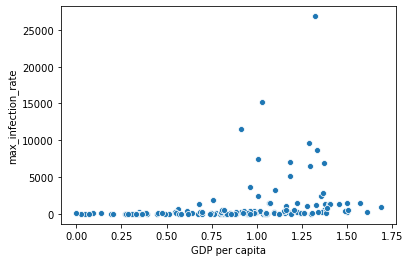

In [61]:
#x ve y icin karsilastirmak isteyecegimiz sütunlardan GDP / max.inf.rate ile baslayalim:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,y)


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

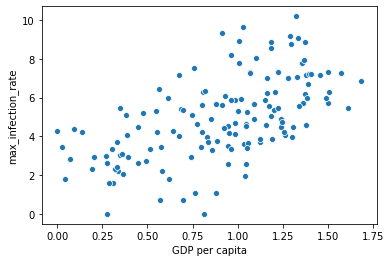

In [62]:
#this graph shows us that as 'GDP per capita' grows, the number off the max number of infection eyes also growing.
#but we can not see enough details in this graph.
#this happens because the difference between the S K Love XX is and why access as you can see in why access the scale is between-
#the range of the values are between zero and 25.000 and in XX says we have from zero until one point seven.
#so this difference between x x difference of scale in X axis and why access has caused the problem that we cannot-
#enough details in our data. So for so to solve this problem, what we can do is to use log scaling. 
#no y axis.so likens. i can use non prime angels. There is a method:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

In [ ]:
#actually this will apply in log scaling to the y. So if you run it again, this scale has changed from 0 to 10. 
#(y ekseni böylece 0-10 arasi degistirildi ve grafik daha asagi yukari görünebiliri noktalar halini aldi)
#so this is completely shows us as it goes. So this slope,as you can see there is increase. There is a correlation positive.
#but there is another part which we can use for better regionalization. This blood called wreck plot in Seaborn.
#So i can say: 

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

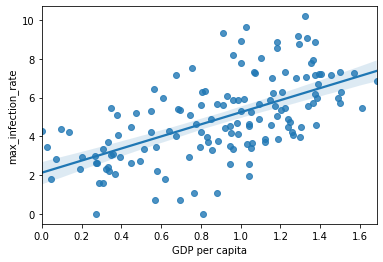

In [63]:
sns.regplot(x, np.log(y)) # dedigimizde regresyon cizgimizi cekecektir
#as yo can see we have feeted it line. Actually we have done this because off better regionalization , so that everyone can understand.
#Actually there is a positive slope between these two variables.("max inf rate" & "GDP per capita")

### Task 5.2: Plotting Social support vs maximum Infection rate

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

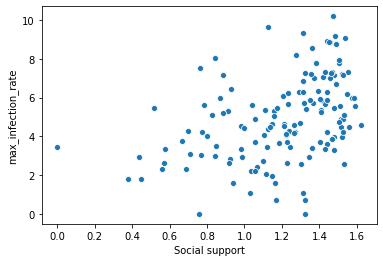

In [40]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

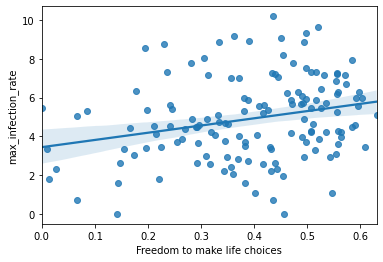

In [43]:
sns.regplot(x, np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

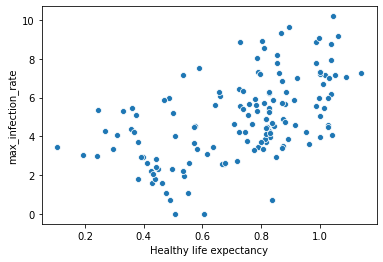

In [41]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

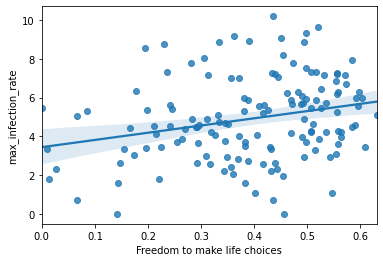

In [44]:
sns.regplot(x, np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

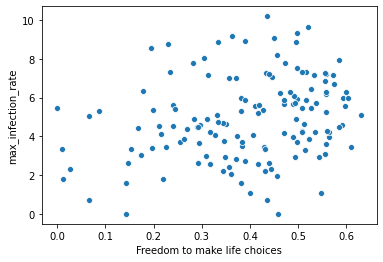

In [42]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

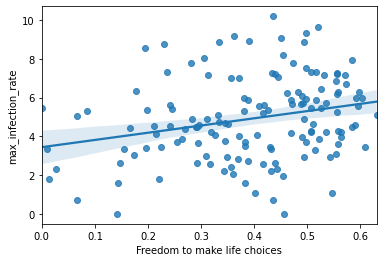

In [45]:
sns.regplot(x, np.log(y))

In [ ]:
#we have found very interestingresult in this analysis. This result shows that people who are living in developed countries-
#are more prone to getting the infection off krone Larry's with compare off with compared to less developed countries.
#You might say that this result is because off lack of corona test kits in less developed countries, in order to prove that this-
#is not the case, i recommend you to do the exact same analysis on the data said related to cumulative number of the deaths.
#As a practice and find out the result you can find, tha data said in a folder called Data set for Practice in your Home Directory.
#i hope you enjoyed discourse.

In [64]:
#Quiz:
 #   1)Why did we perform aggregation on COVID19 dataset?
        #a)Because in each row of our dataframe we had data related to each province in each country, but for our analysis we needed number of confirmed cases related to each country.
        #b)To reduce number of rows in our dataset

#    2)In drop method we have a parameter called inplace, what is it used for?
         #a)We set this parameter to be True to drop the columns instantly, without returning a new dataframe
         #b)We set this parameter to be False to drop the columns instantly, without returning a new dataframe
#    3)Which options could be good measures for our analysis?
         #Average number of new infected cases in every 24 ours, over our time period r/f?
         #Maximum number of new infected cases in every 24 ours, over our time period r/ f?
         #Sum of all of the number of infected cases till date  r/f?
#    4)Which of this methods will return first derivative of a pandas series values?
         #a)div()
         #b)diff()
#    5) Which method is used for creating the correlation matrix in pandas dataframe?
         #a)apply()
         #b)corr()
#    6)In task 4, why did we change the indices of the world happiness report dataset to country names, before joining it with Corona data dataframe?

        #To access the data related to a country easily. r/f
        #To have same indices as Corona data dataframe in order to join them on index. r/f
        #To reduce number of columns in our dataset. r/f
#     7)In Seaborn, which of these methods plots scatter plot and fit a line to the plot?

#        a)scatterplot()
#        b)stripplot()
#        c)regplot()
